# About:
- Date: 04/10/2022
- Pages: 86

**Note**: This chapter was unexpectedly harder then the previous ones. This took me a few hours searching and reading about `autograd` of `mxnet` on the Internet.

## Exercise 1
Takes a function has $n$ parameters $f(\boldsymbol{x})$ with $\boldsymbol{x} = [x_1, x_2, \dots, x_n]$.

Its first derivative will be a vector of size $n$: $\left[\dfrac{\partial f}{\partial x_1}, \dfrac{\partial f}{\partial x_2}, \dots, \dfrac{\partial f}{\partial x_n}\right]$

And its second derivative will be a matrix of size $n\times n$ with elements: $\dfrac{\partial^2 f}{\partial x_{1}^{2}}, \dfrac{\partial^2 f}{\partial x_{1} \partial x_{2}}, \dots, \dfrac{\partial^2 f}{\partial x_{1} \partial x_n}, \dfrac{\partial^2 f}{\partial x_{2} \partial x_{1}}, \dots, \dfrac{\partial^2 f}{\partial x_{2}\partial x_n}, \dots$

It is easy to see that computing $n^2$ second derivative terms would be significantly more expensive then computing $n$ first derivative terms.

## Exercise 2

In [75]:
from mxnet import autograd, np

x = np.arange(4)
x.attach_grad()
with autograd.record():
    y = 2 * x * x
y.backward()
x.grad

array([ 0.,  4.,  8., 12.])

In [76]:
# y.backward()

It caused error because the first `y.backward()` call has already freed the computational graphs saved with `autograd.record()`.

Add `retain_graph=true` to `y.backward()` to keep differentiating.

## Exercise 3

In [77]:
def f(a):
    b = a * 2
    while np.linalg.norm(b) < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [78]:
a = np.arange(6).reshape(2, 3)
a

array([[0., 1., 2.],
       [3., 4., 5.]])

In [79]:
a.attach_grad()
with autograd.record():
    d = f(a)
d.backward()
a.grad

array([[256., 256., 256.],
       [256., 256., 256.]])

It works normally on each element of vector/matrix (as long as the `np.linalg.norm(b)` works normally)

## Exercise 4

In [80]:
from d2l import mxnet as d2l
from matplotlib_inline import backend_inline
from mxnet import np, npx

npx.set_np()


def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize


def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


def plot(X,
         Y=None,
         xlabel=None,
         ylabel=None,
         legend=[],
         xlim=None,
         ylim=None,
         xscale='linear',
         yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'),
         figsize=(3.5, 2.5),
         axes=None):
    """Plot data points."""

    def has_one_axis(X):
        # True if `X` (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1
                or isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x, y, fmt) if len(x) else axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

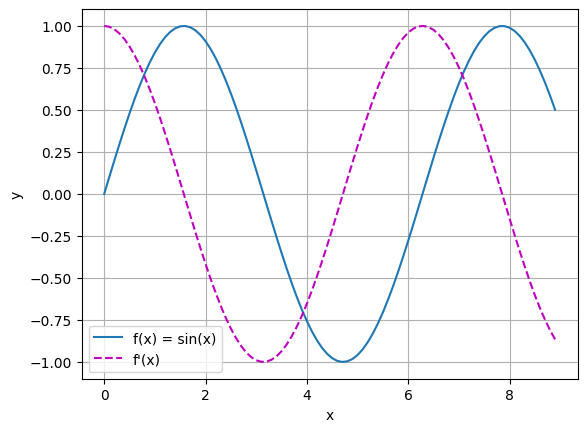

In [81]:
def f(x):
    return np.sin(x)
x = np.arange(0, 9, 0.1)
x.attach_grad()
with autograd.record():
    y = f(x)
y.backward()
y_derivative = x.grad
plot([x, x], [y, y_derivative], 'x', 'y', legend=['f(x) = sin(x)', "f'(x)"])

## Exercise 5 + 6
![exercises-5-6]( assets/exercises-5-6.jpg )

## Exercise 7
- *Forward differentiation*: 
  $$\dfrac{\partial h}{\partial x}, \dfrac{\partial t}{\partial x}, \dfrac{\partial g}{\partial x} \rightarrow \dfrac{\partial z}{\partial x}  \rightarrow \dfrac{\partial f}{\partial x}$$
- *Backward differentiation*:
  $$\dfrac{\partial f}{\partial z}, \dfrac{\partial f}{\partial g} \rightarrow \dfrac{\partial f}{\partial h}, \dfrac{\partial f}{\partial t} \rightarrow \dfrac{\partial f}{\partial x}$$

## Exercise 8
Suppose there are $n$ parameters $\boldsymbol{x} = [x_1, x_2, \dots, x_n]$ and you only want to calculate $\dfrac{\partial f}{\partial x_i}$. Then you should use ***forward differentiation*** as it starts from $x_i$ and only calculate what's needed for $\dfrac{\partial f}{\partial x_i}$ (the intermediate data needed is fewer). But if you want to compute the whole gradient, then use ***backward differentiation***. It computes data for every nodes in the dependency graph. If you use ***forward differentiation*** for each $x_i$ to compute the gradient then it would be slower (and duplicated computation if you don't save calculated ones).